In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

import numpy as np
import sklearn.model_selection as skm

In [ ]:

df = pd.read_csv("data/wine_quality_merged.csv")
print("First rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

First rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1    

/var/folders/gf/frqp99l15rz69b0dgydv7m380000gn/T/ipykernel_5746/1414237648.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_numeric_dtype(df[target]) and not pd.api.types.is_categorical_dtype(df[target]):


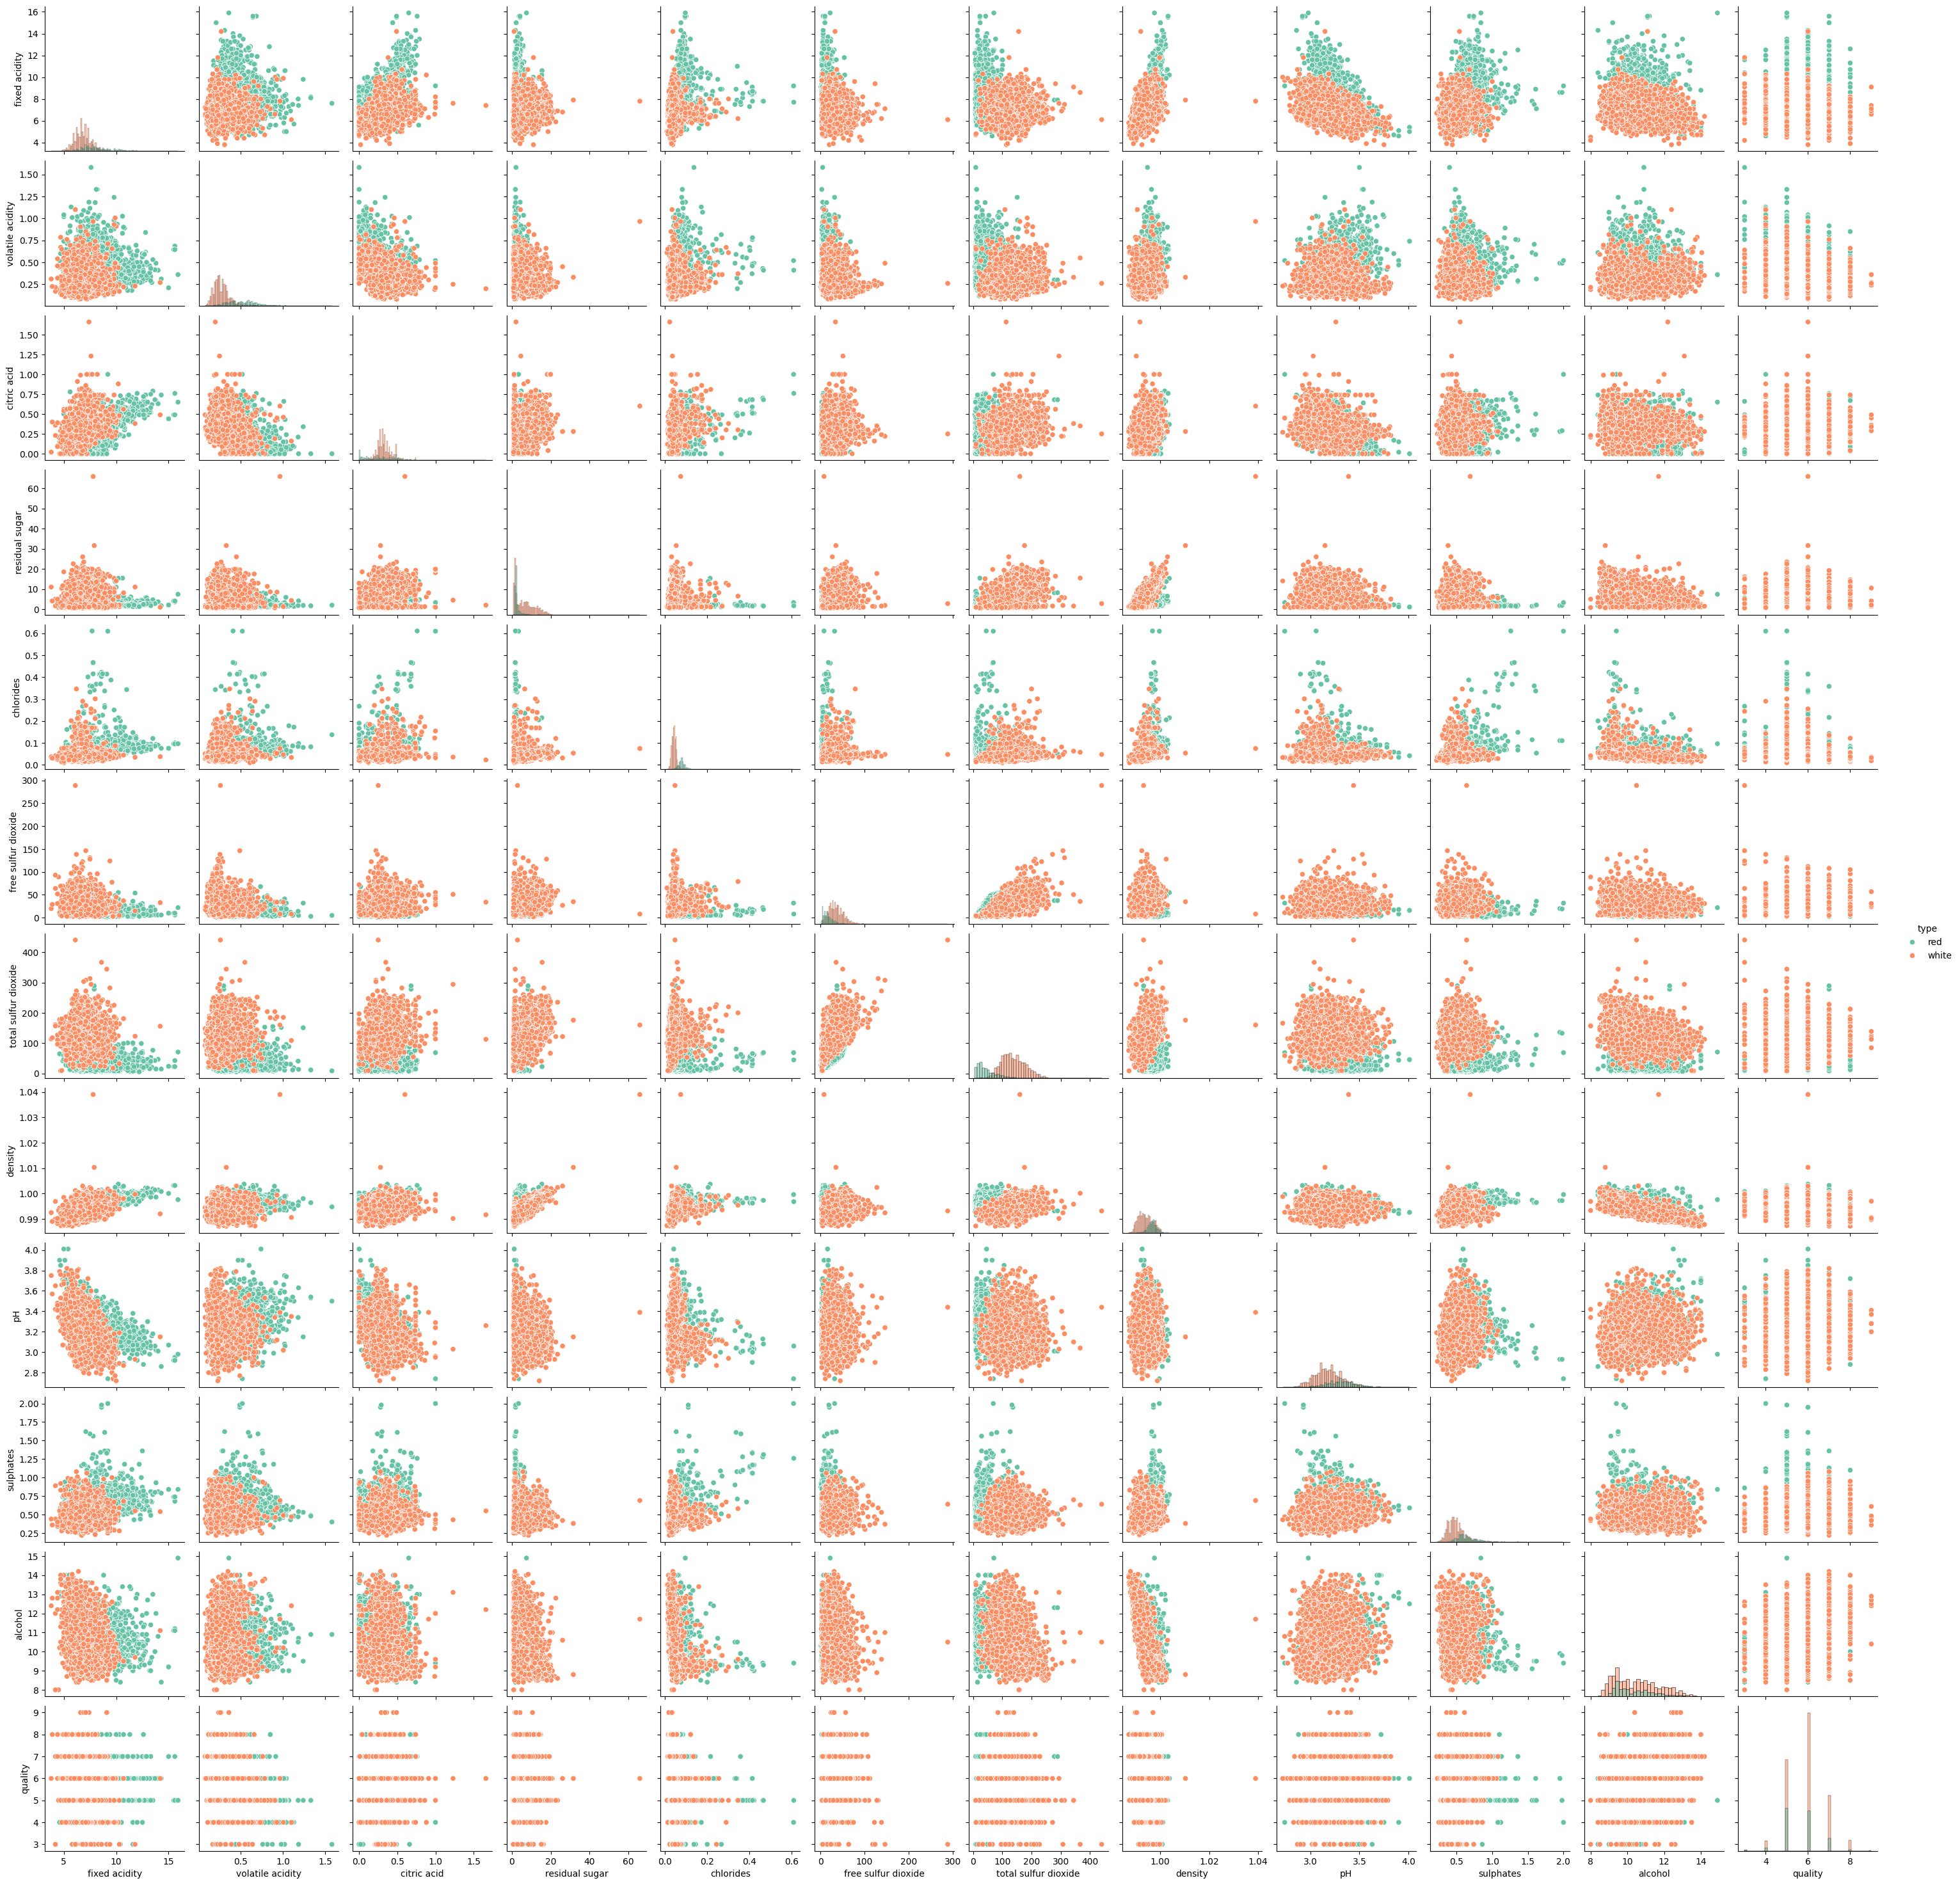

/var/folders/gf/frqp99l15rz69b0dgydv7m380000gn/T/ipykernel_5746/1414237648.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_numeric_dtype(df[target]) and not pd.api.types.is_categorical_dtype(df[target]):


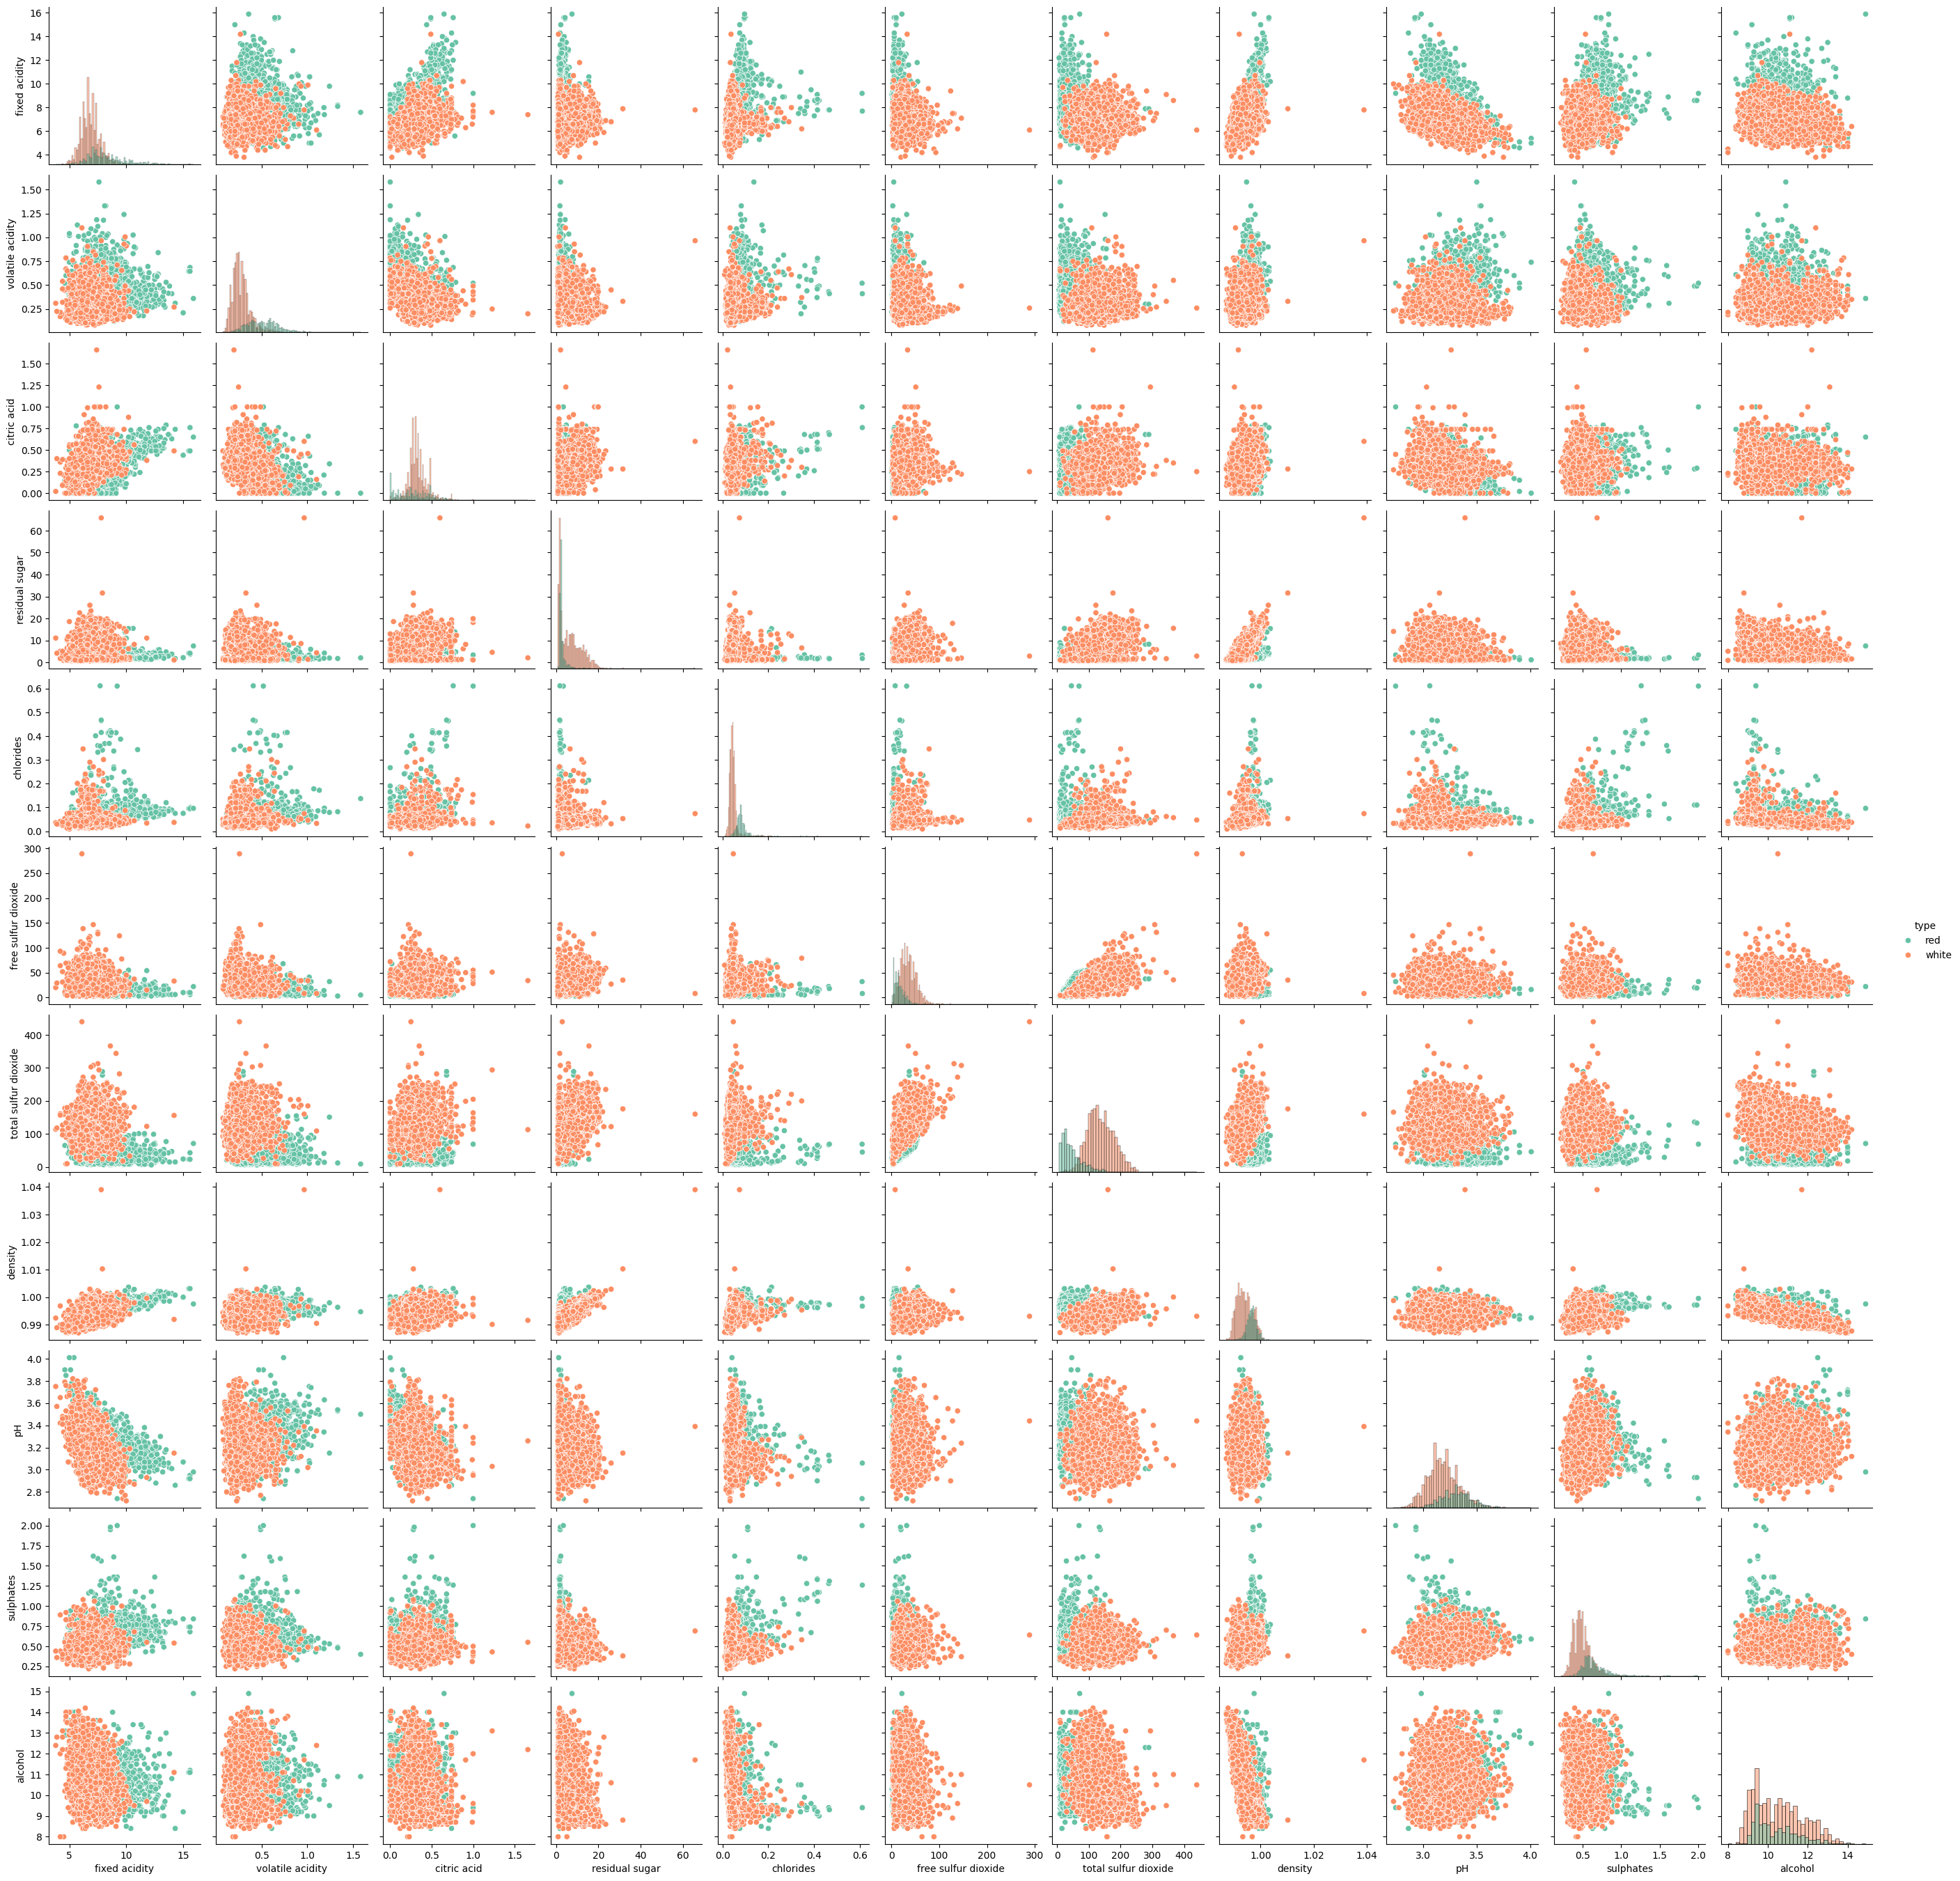

In [24]:
def pairwise_plot(df, target=None):
    """
    Creates a pairwise scatterplot of all numeric features.
    If target is specified (column name), color-code points by its discrete values.
    
    Args:
        df (pd.DataFrame): The dataset
        target (str, optional): Name of the target/dependent variable column
    """
    if target is not None:
        if target not in df.columns:
            raise ValueError(f"Target column '{target}' not found in dataframe.")
        # Check if target is discrete
        if not pd.api.types.is_numeric_dtype(df[target]) and not pd.api.types.is_categorical_dtype(df[target]):
            df[target] = df[target].astype('category')
        sns.pairplot(df, hue=target, diag_kind='hist', palette='Set2')
    else:
        sns.pairplot(df, diag_kind='hist')
    plt.show()

# Define your discrete target variable (dependent variable)
target_column = "type"  # <-- change to your CSV column for classification
df_classify = df.drop("quality", axis = 1)   # axis = 1 defines that it is a column to be dropped

# Call the pairwise plot function
pairwise_plot(df, target=target_column)
pairwise_plot(df_classify, target=target_column)


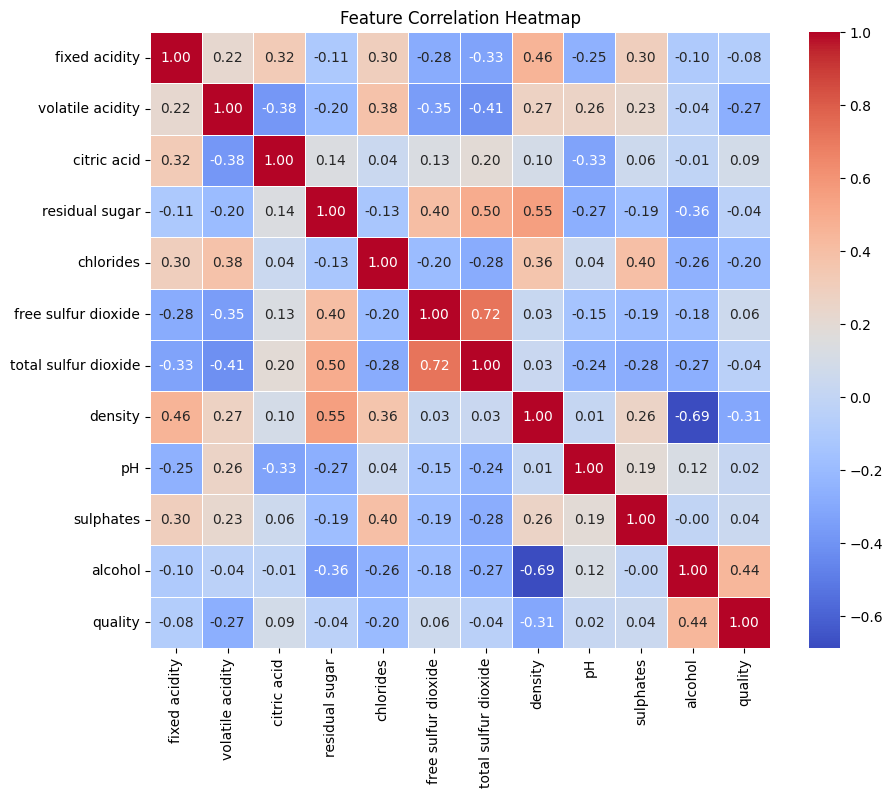

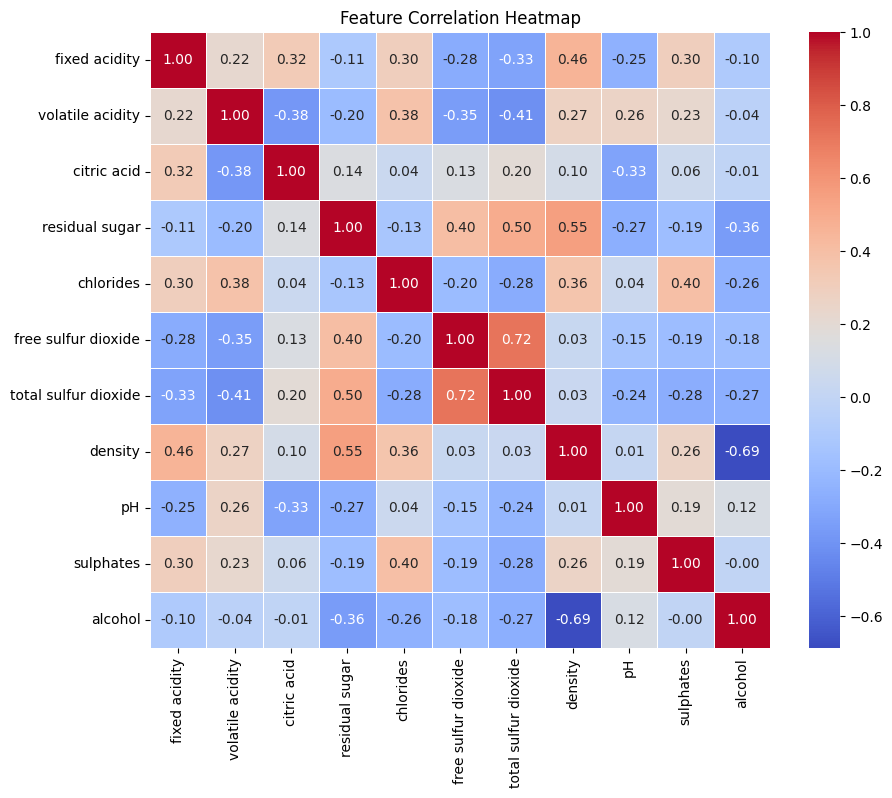

In [26]:
def covariance_heatmap(df):
    """
    Plots a heatmap showing covariances (or correlations) between numeric features.
    
    Args:
        df (pd.DataFrame): The dataset
    """
    numeric_df = df.select_dtypes(include='number')
    if numeric_df.shape[1] < 2:
        print("Not enough numeric columns for covariance analysis.")
        return
    cov_matrix = numeric_df.corr()  # use .cov() if you want covariance instead of correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

covariance_heatmap(df)
covariance_heatmap(df_classify)

